In [55]:
using MAT
using DSP
using Plots
pyplot()
# gr()

function getbandrange(bandname):
    """Return the cutoff frequecy of each band."""
    bandrange = Dict(
            "delta" => (  2,  4),
            "theta" => (  4,  8),
            "alpha" => (  8, 12),
            "beta" =>  ( 15, 30),
            "gamma" => ( 30,150),
            "low gamma" => (30, 80),
            "high gamma" => (80,150),
            "lowpass" => (0.5,200),
            "highpass" => (200,500))
    return bandrange[bandname]
end

getbandrange (generic function with 1 method)

In [316]:
filename = "180904-1-5.mat"
datadir = "../../Data/Chen Zhou/EEG/Compact"
resultdir = "../../Result/"

# channels = data["channels"]
# markers = data["markers"][0,:]
# times = data["times"][0,:]
# Import data
fs = 2000
data = matread(joinpath(datadir, filename))
channels = data["channels"]
markers = data["markers"]
times = data["times"];
times[end]

117.59949999999999

In [302]:
filename = "999999-9-9.mat"
datadir = "../../Data/Demo/EEG/Compact"
resultdir = "../../Result/"

# channels = data["channels"]
# markers = data["markers"][0,:]
# times = data["times"][0,:]
# Import data
fs = 2000
data = matread(joinpath(datadir, filename))
channels = data["channels"]
markers = data["markers"]
times = data["times"]
times[end]

149.99949999999998

  0.011104 seconds (490 allocations: 1.829 MiB)


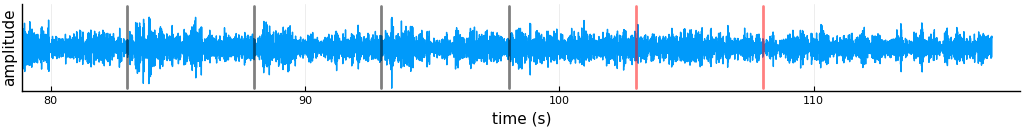

In [319]:
x = channels[109,:]
lowcut, highcut = getbandrange("low gamma")
responsetype = Bandpass(lowcut, highcut; fs=fs)
designmethod = Butterworth(8)
# designmethod = FIRWindow(hanning(64))
@time x_filt = filt(digitalfilter(responsetype, designmethod), x);

tspec = 70*fs:117*fs
plot(times[tspec], x_filt[tspec], size=(1024,128), legend=false, 
    yticks=[], xlims=[80,117])

grating_markers = [98, 93, 88, 83, 78, 73, 68, 63, 58, 53]
entrain_markers = [103, 108]
for i in grating_markers
    plot!([i,i],[minimum(x_filt[tspec]), maximum(x_filt[tspec])], color=:black, linewidth=2, alpha=0.5)
end

for i in entrain_markers
    plot!([i,i], [minimum(x_filt[tspec]), maximum(x_filt[tspec])], color=:red, linewidth=2, alpha=0.5)
end

plot!(xlabel="time (s)", ylabel="amplitude")


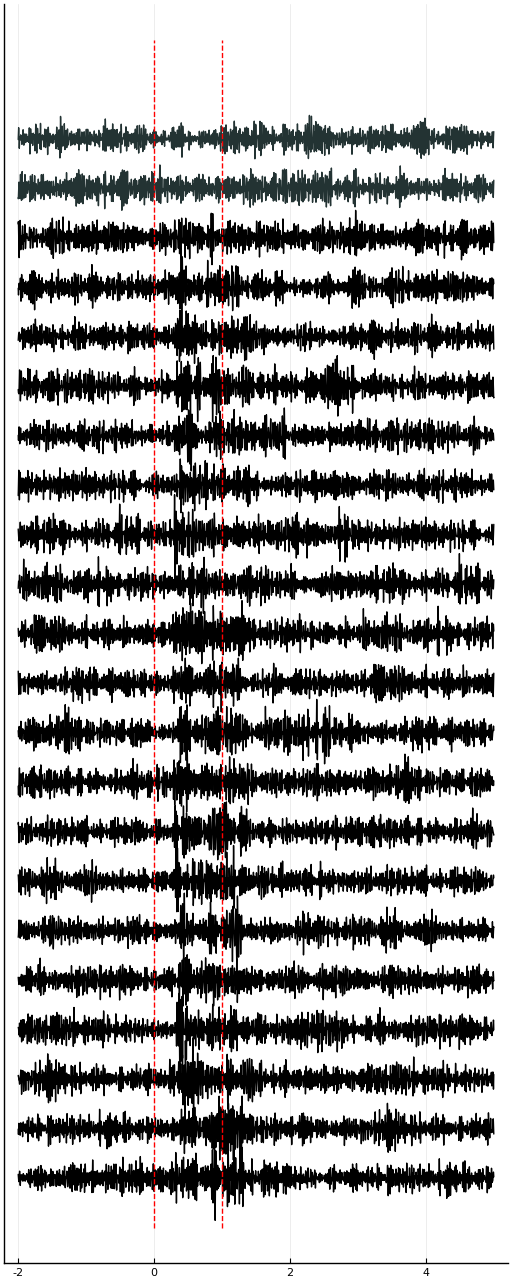

In [320]:
chidx = 109
# curve = channels[chidx, :]

curve = x_filt

roi = -2*fs:5*fs
plot(legend=false, size=(512,64*length(markers["grating"])))
step = maximum(abs.(curve))
for midx = 1:length(markers["grating"])
    slice = curve[roi+Int(markers["grating"][midx])*fs]
    plot!(roi/fs, slice+step*(midx-1), color=:black)
end

for (midx, marker) in enumerate(entrain_markers)
    slice = curve[roi+Int(marker)*fs]
    plot!(roi/fs, slice+step*(midx-1+20), color="#233333")
end

plot!([0,0], [-step, step*23], color="red", linestyle=:dash)
plot!([1,1], [-step, step*23], color="red", linestyle=:dash)

plot!(yticks=[], xlim=[roi[1]/fs, roi[end]/fs])

---
# Misc

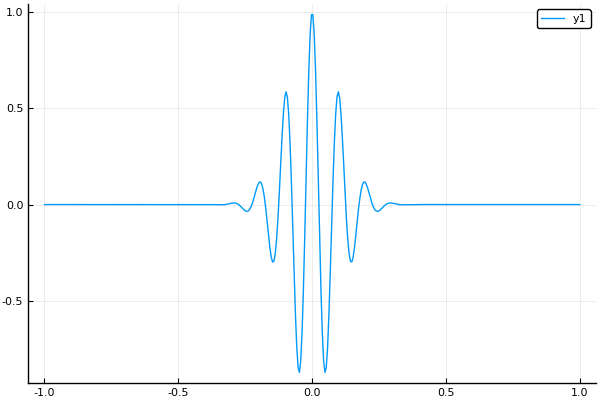

In [152]:
function morlet(F::T, fs) where {T<:Number}
    s = 6 / (2 * pi * F)
    wtime = linspace(-1,1,2*fs)
    wavelet = exp.(2*pi*wtime*F*1im) .* exp.(- wtime.^2/(2*s^2))  # morlet wavelet
    return wavelet
end
plot(linspace(-1,1,2*fs), real.(morlet(10, fs)))